In [117]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#Load/preview data
df = pd.read_csv("LabourTrainingEvaluationData.csv")
df.head()

Age          Eduacation      Race         Hisp MaritalStatus  Nodeg  \
0   45  LessThanHighSchool  NotBlack  NotHispanic       Married      1   
1   21        Intermediate  NotBlack  NotHispanic    NotMarried      0   
2   38          HighSchool  NotBlack  NotHispanic       Married      0   
3   48  LessThanHighSchool  NotBlack  NotHispanic       Married      1   
4   18  LessThanHighSchool  NotBlack  NotHispanic       Married      1   

   Earnings_1974  Earnings_1975  Earnings_1978  
0      21516.670      25243.550      25564.670  
1       3175.971       5852.565      13496.080  
2      23039.020      25130.760      25564.670  
3      24994.370      25243.550      25564.670  
4       1669.295      10727.610       9860.869

In [3]:
df.describe()

Age         Nodeg  Earnings_1974  Earnings_1975  Earnings_1978
count  15992.000000  15992.000000   15992.000000   15992.000000   15992.000000
mean      33.225238      0.295835   14016.800304   13650.803376   14846.659673
std       11.045216      0.456432    9569.795893    9270.403225    9647.391524
min       16.000000      0.000000       0.000000       0.000000       0.000000
25%       24.000000      0.000000    4403.452250    4398.823000    5669.298000
50%       31.000000      0.000000   15123.580000   14557.110000   16421.975000
75%       42.000000      1.000000   23584.180000   22923.737500   25564.670000
max       55.000000      1.000000   25862.320000   25243.550000   25564.670000

Age stuff for section 1.

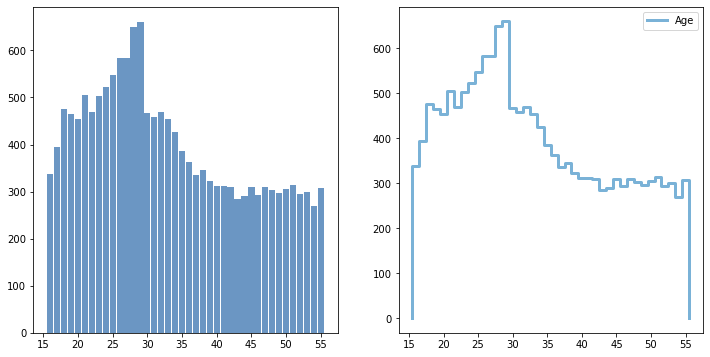

In [8]:
#Hist/PMF
histAge = thinkstats2.Hist(df["Age"], label="Age")
thinkplot.PrePlot(2,1,2)
thinkplot.Hist(histAge)
thinkplot.SubPlot(2)
thinkplot.Pmf(histAge)
thinkplot.Config()

In [18]:
#Fractions at and above 51
#How many are 51?
age51 = histAge.Freq(51)

#Over 51
cdfAge = thinkstats2.Cdf(df["Age"])
over51 = 1-cdfAge.Prob(51)

print("Age 51 percentage:", (age51/df["Age"].count())*100)
print("Over 51 percentage:", round(over51*100))

Age 51 percentage: 1.963481740870435
Over 51 percentage: 7


In [16]:
#Median age
"Median Age", df["Age"].median()

('Median Age', 31.0)

I'd say the distribution looks reasonable-ish for the working age, maybe a bit young. I'd theorize this may be partially due to less post secondary education, lower life lengths, a greater proportion of defined benefit pensions, and lasting effects of the Vietnam war. The largest factor I'd think of is that more women didn't work after having children, and leaving the workforce in their 20s. This would need actual research to confirm. 

Demographics part

In [24]:
#Education distribution
round(df["Eduacation"].value_counts()/df["Eduacation"].count(), 2)

Married       0.71
NotMarried    0.29
Name: MaritalStatus, dtype: float64

In [22]:
#Race Distribution
round(df["Race"].value_counts()/df["Race"].count(), 2)

NotBlack    0.93
black       0.07
Name: Race, dtype: float64

In [23]:
#Hispanic Distributio
round(df["Hisp"].value_counts()/df["Hisp"].count(), 2)

NotHispanic    0.93
hispanic       0.07
Name: Hisp, dtype: float64

In [25]:
#Marital Status
round(df["MaritalStatus"].value_counts()/df["MaritalStatus"].count(), 2)

Married       0.71
NotMarried    0.29
Name: MaritalStatus, dtype: float64

In [26]:
#Degree Having-ness
round(df["Nodeg"].value_counts()/df["Nodeg"].count(), 2)

0    0.7
1    0.3
Name: Nodeg, dtype: float64

Overall these factors look pretty reasonable. 

I didn't really strictly critique if you thought it matched or didn't match the real stats of the US. The point really was just to look critically at the data, and assess if it makes sense for what we are using it for. I appologize for the overly specific wording of the question. 

Earnings Part

<AxesSubplot:ylabel='Density'>

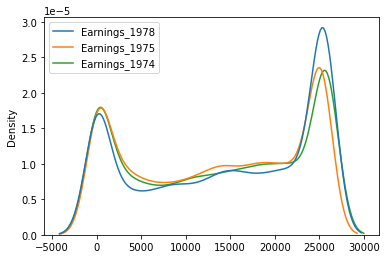

In [32]:
#Plot 3 earnings values
tmp = df[["Earnings_1978", "Earnings_1975", "Earnings_1974"]]
sns.kdeplot(data=tmp)


As a conclusion, there seems to be a large jump in the number of people earning near the top end, around $25k. Otherwise the distributions are pretty similar. 

In [ ]:
#NOTE: the effect size calculation gives a nan answer. 
#That's fine. We don't need to worry about fixing it. 
#Using a stats package returns the same thing. It has to do with binary data. 
#You can read this if you care: https://stats.stackexchange.com/questions/214378/how-to-treat-cohens-d-infinites-nans-calculated-using-binary-proportions-for-me 
#This wasn't a graded deal, you were not expected to do anything but run the function and get the answer. 

In [121]:
#Effect Size on earnings
dftmp = df[df["Earnings_1978"] > 0]

listOfStuff = [("Race", "Black", "NotBlack"), ("Hisp", "Hispanic", "NotHispanic"), ("MaritalStatus", "Married", "NotMarried"), ("Nodeg", 1, 0)]
for i in listOfStuff:
    tup = i
    df1 = dftmp[dftmp[tup[0]] == tup[1]]
    df2 = dftmp[dftmp[tup[0]] == tup[2]]
    df1 = pd.to_numeric(df1["Earnings_1978"], errors='coerce')
    df2 = pd.to_numeric(df2["Earnings_1978"], errors='coerce')
    print("Effect Size of "+tup[0], thinkstats2.CohenEffectSize(df1, df2))

#You could do this one by one, instead of a list of tuples, but typing is boring. 

Effect Size of Race nan
Effect Size of Hisp nan
Effect Size of MaritalStatus 0.790832979186224


the largest impact is marital status. I suspect this is due to people who earn more money in the 70s likely have their wives stay home, so it is self selecting. As well, I'd bet there were many fewer older people, in more senior roles, that were not married, compared to modern times. 

In reality, it is black/not black. We need to investigate further....

In [105]:
#Create a hist, pmf, and stats for 1987 Earnings
#Note: if you don't round or otherwise create bins, the thinkstats plots for this will be weird
#That's because there are very few values that are the same, e.g. $14762.34, $15672.86, etc... 
#Every cent is a different value. 
#Seaborn plots will probably look better by default. 

Cohort - NotBlackNotHispanicMarried |----  Median Income: 20462.08


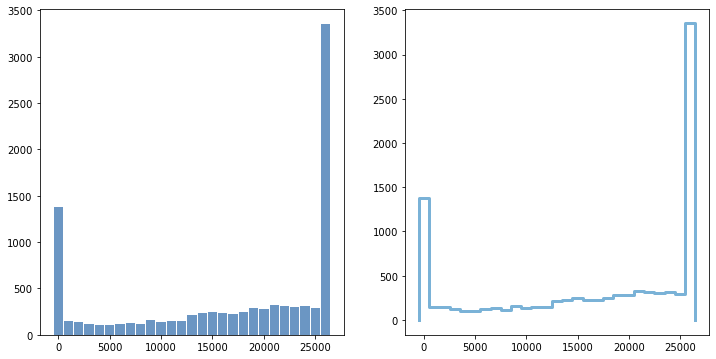

Cohort - NotBlackNotHispanicNotMarried |----  Median Income: 10431.27


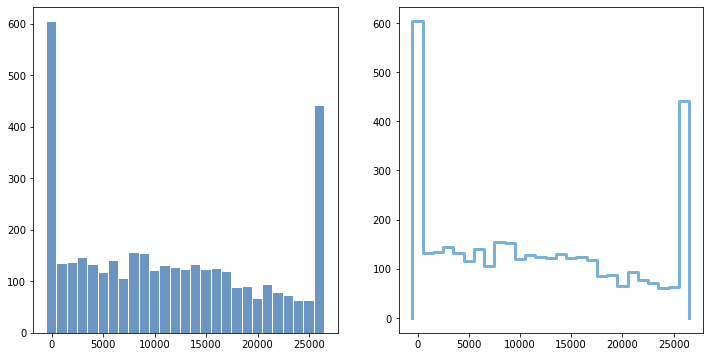

Cohort - blackNotHispanicMarried |----  Median Income: 15174.77


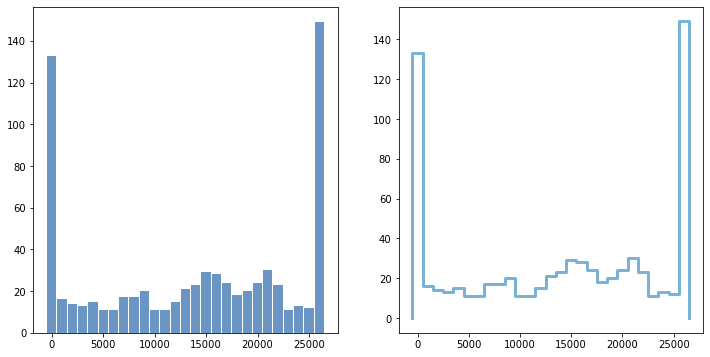

Cohort - NotBlackhispanicNotMarried |----  Median Income: 9350.3145


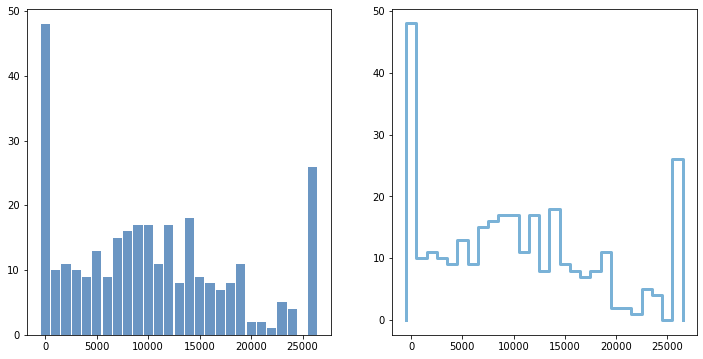

Cohort - blackNotHispanicNotMarried |----  Median Income: 7862.983


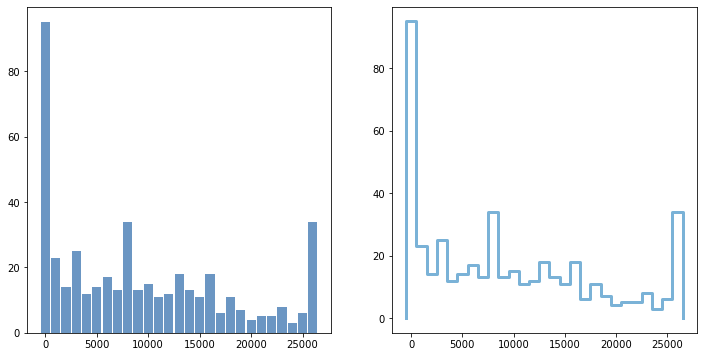

Cohort - NotBlackhispanicMarried |----  Median Income: 15636.560000000001


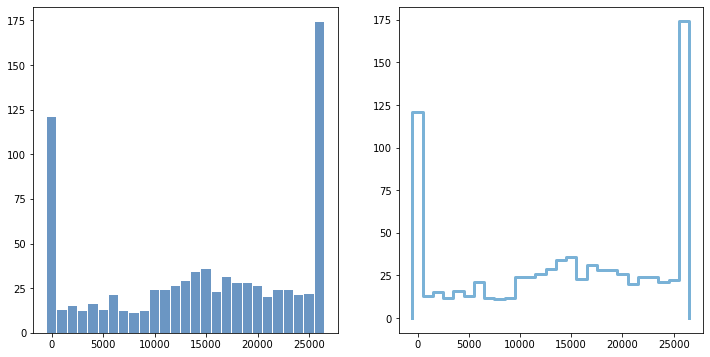

<Figure size 576x432 with 0 Axes>

In [106]:
#1978 Statistics Charts by Cohort, with median. 
listHist = cohort(df, "Race", "Hisp", "MaritalStatus", "Earnings_1978")
i=0
while i < len(listHist):
    thinkplot.PrePlot(2,1,2)
    h = listHist[i]
    print("Cohort -", h[1], "|----  Median Income:", h[2])
    thinkplot.Hist(h[0])
    thinkplot.SubPlot(2)
    thinkplot.Pmf(h[0])
    thinkplot.Config()
    thinkplot.Show()
    i = i + 1

Not black, not hispanic, married people 'win' with a median income of ~$20400
Black, not hispanic, unmarried people check in at sub 8000. 

My theorized reason is pretty simple, and probably obvious - people are racist, especially 40+ years ago. 

In [122]:
#Outliers. 
df.describe()

Age         Nodeg  Earnings_1974  Earnings_1975  Earnings_1978
count  15992.000000  15992.000000   15992.000000   15992.000000   15992.000000
mean      33.225238      0.295835   14016.800304   13650.803376   14846.659673
std       11.045216      0.456432    9569.795893    9270.403225    9647.391524
min       16.000000      0.000000       0.000000       0.000000       0.000000
25%       24.000000      0.000000    4403.452250    4398.823000    5669.298000
50%       31.000000      0.000000   15123.580000   14557.110000   16421.975000
75%       42.000000      1.000000   23584.180000   22923.737500   25564.670000
max       55.000000      1.000000   25862.320000   25243.550000   25564.670000

Just by looking at the max values, there are no outliers on the high side. All the max values are low. The only thing really in question is if 0 is an outlier, or proper. 

I'd suspect that for this data it is fine, if we are analyzing income, lots of people earn 0. If we had any values for min/max that were super low/high, we'd graph a histogram and look at the tails to see if those are "detached" or if they are just part of the regular pattern of data. 

Functions used are below. 

In [101]:
#Modification of cohort code to send back a tuple of results. 
#You could do this more manually as well.
def cohort(df_in, cohort1, cohort2, cohort3, earningsColumn):
    df_in["Cohort"] = (df_in[cohort1]+df_in[cohort2]+df_in[cohort3])
    cohortList = df_in["Cohort"].unique()
    i = 0
    resList = []
    while i < cohortList.size:
        tmp = df_in[df_in.Cohort == cohortList[i]]
        histTmp = thinkstats2.Hist(round(tmp[earningsColumn], -3))
        resList.append((histTmp, cohortList[i], tmp[earningsColumn].median()))
        i = i + 1
    return resList

In [112]:
def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx-1)*np.std(x, ddof=1) ** 2 + (ny-1)*np.std(y, ddof=1) ** 2) / dof)